# Import necessary packages

In [2]:
import numpy as np

In [3]:
import time

In [4]:
import matplotlib.pyplot as plt

# Define parameters

In [64]:
# Define parameter values
A=1
alpha=0.3
beta=0.5

In [6]:
n_k=101

In [7]:
delta_values=[0.1,1]

In [8]:
#Define our tolerance
toler = 1e-5

In [9]:
# Define the utility function
def u(c):
    return np.log(c)

In [10]:
#Create initial guess for the value function
v_init=np.zeros(shape=(n_k,1))

In [11]:
max_iter=10000

In [12]:
policy=np.zeros(shape=(n_k,1))

In [13]:
v1=np.zeros(shape=(n_k,1))

In [14]:
v=np.zeros(shape=(n_k,1))

# First, VFI

In [15]:
def Tv(v, k, d):
    start_time = time.time()
    #Start with iteration 0
    iter = 0
    #We need to set an initial error
    error = toler+1 
    #While these two conditions are true, do this.
    while (toler<error) and (iter<max_iter):
    #We will use this vector to store the distance between the given value function and the new.
        distance=np.zeros(shape=(n_k,1)) 
        #That is, for each element of the capital grid, perform the following:
        for i in range(len(k)):
            #We need to set an initial value for vmax. As soon as we do something, this will update
            vmax = -np.inf
            #Fixing an element in the grid, calculate consumption and the value of selecting each feasible capital stock tomorrow
            for j in range(len(k)): 
                #Consumption
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                #remember that c must be nonnegative
                if c>=0: 
                    #calculate the value using the consumption from above, and the current element j of the value function, which represents the value of having that capital stock tomorrow.
                    v_temp = u(c)+beta*v[j] 
                    #if the choice j' is better than j, then
                    if v_temp>vmax: 
                        #set j' as the new best choice
                        vmax=v_temp 
                        #and set that choice j' as the policy for element i of the capital stock
                        policy_i=k[j]
                #Now, once we have found vmax for a given i, set element i of the new value function to be that value 
                v1[i]=vmax 
                #Find the new policy function by setting element i to be the best choice j'
                policy[i]=policy_i 
                #new distance
                distance[i]=np.abs(vmax-v[i]) 
        #set new error
        error=np.max(distance) 
        #set v as the new calculation v1       
        v=np.copy(v1) 

        if iter % 10 == 0:
            #print Iteration number and error size every 10 iterations
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1

    if iter == max_iter:
        #if we don't converge, let me know
        print("Failed to converge in max_iter iterations") 
    # Record end time
    end_time = time.time() 
    #how long did it take? 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    #give me the value fuction and the policy function
    return v, policy 

0.15627804026698733

iterating for delta = 0.1:
Iteration 0, Max Error: 0.8766675734691947
Iteration 10, Max Error: 0.000738961522324999
Execution time: 2.3646812438964844 seconds


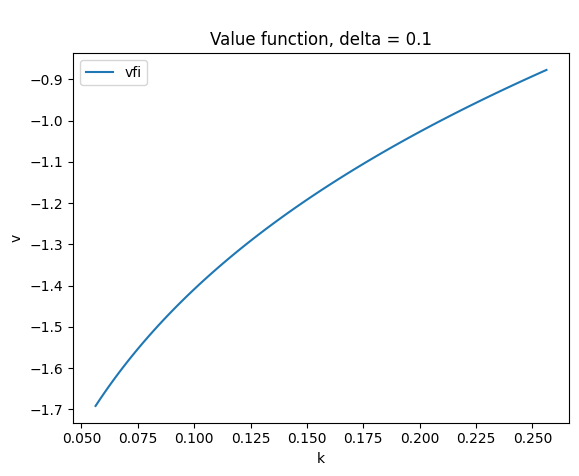

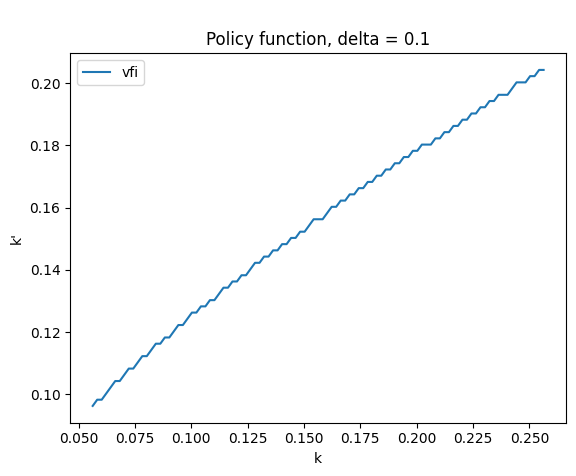

0.06652540281931184

iterating for delta = 1:
Iteration 0, Max Error: 1.0055997047349927
Iteration 10, Max Error: 0.0009783719682610048
Execution time: 2.3360674381256104 seconds


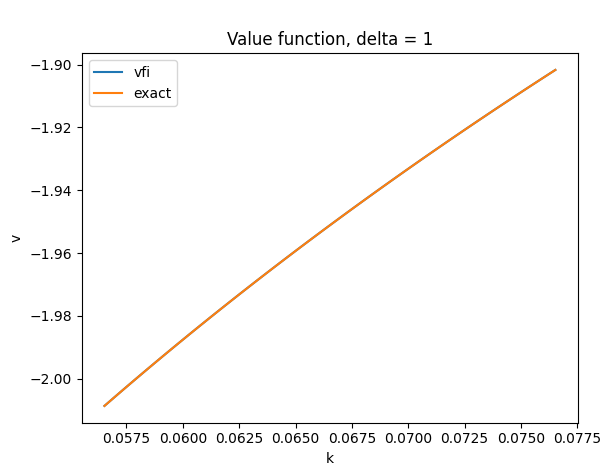

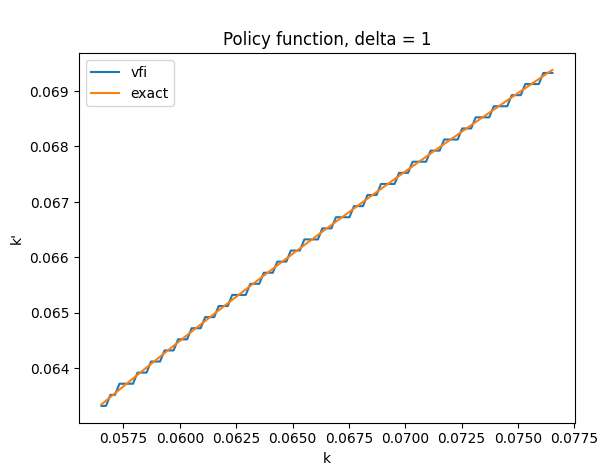

In [18]:
for delta in delta_values:
    if delta == 1:
        K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
        print(K_ss)
        # Be careful with the grid!
        K_grid = np.linspace(K_ss-1e-2, K_ss+1e-2, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
        + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
        a1 = alpha / (1 - alpha * beta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
        print(K_ss)
        # Be careful with the grid!
        K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()



# Now for Howard policy improvement

In [19]:
m_values=[5,10,25,100,500]

In [25]:
def Tv_howard(v, k, m, d):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        v2=v1.copy()
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v2[i]=u(c)+beta*v1[j]
            v1=v2.copy()           
        for i in range(len(k)):
            distance[i]=np.abs(v1[i]-v[i]) 
        error=np.max(distance) 
        v=np.copy(v1)
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 


iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 1.725939285267477
Execution time: 0.655876636505127 seconds


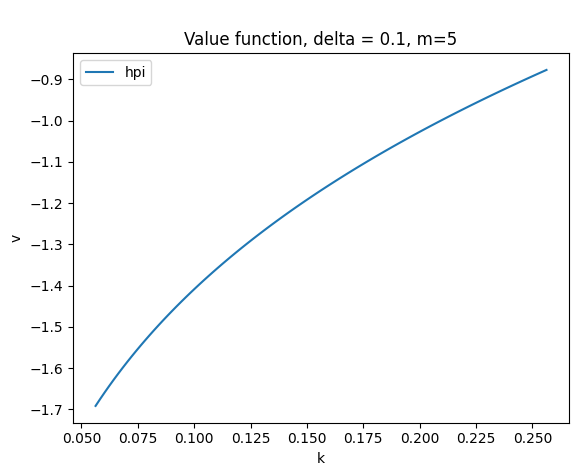

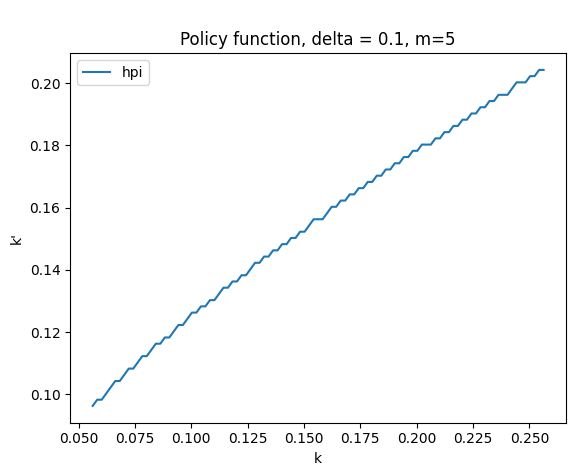


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 2.1591579389451714
Execution time: 0.627004861831665 seconds


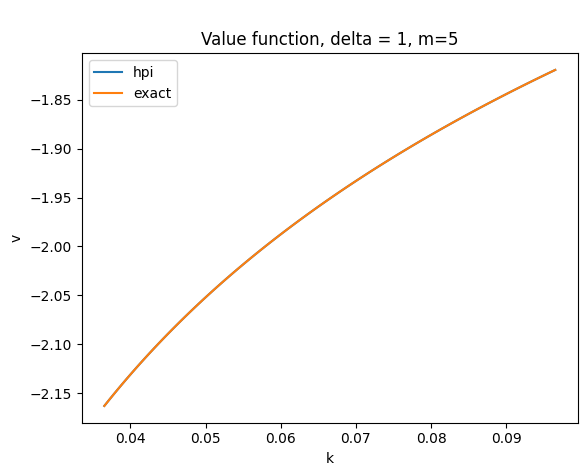

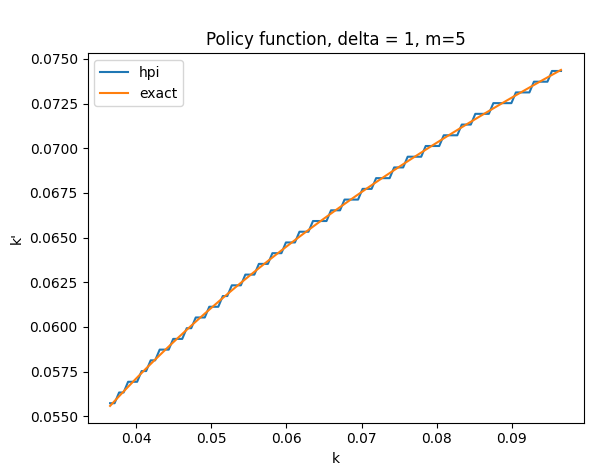


iterating for m = 10:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 1.7524790262611734
Execution time: 0.6867647171020508 seconds


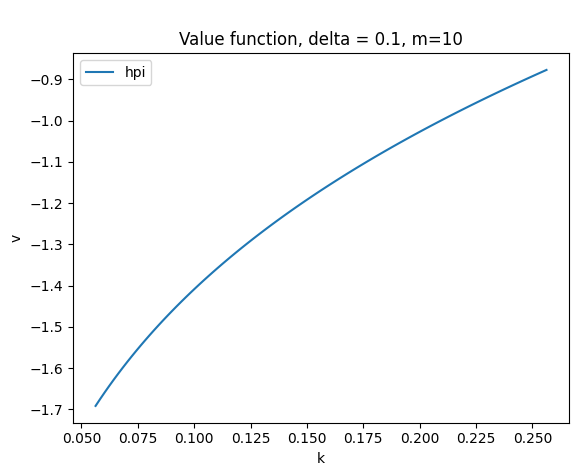

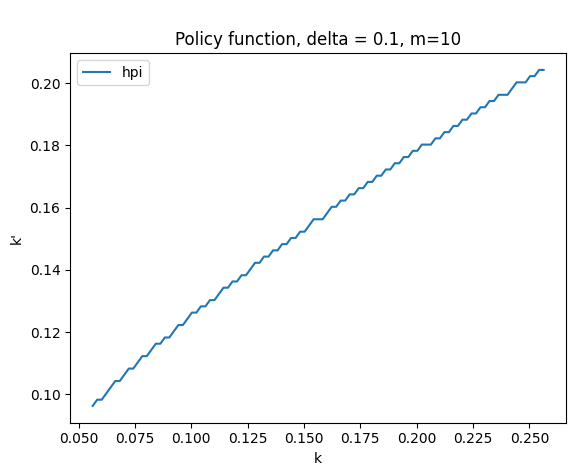


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 2.192359276299983
Execution time: 0.6680705547332764 seconds


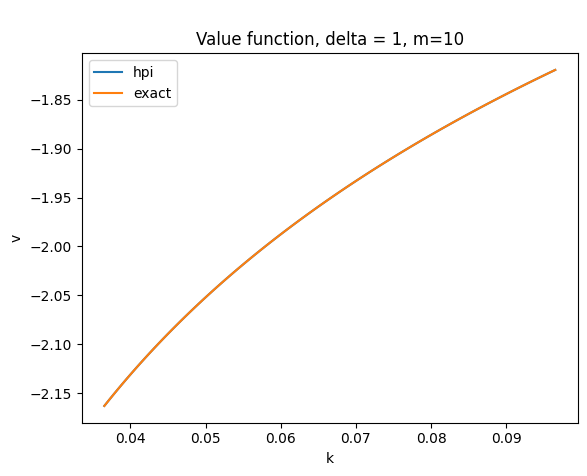

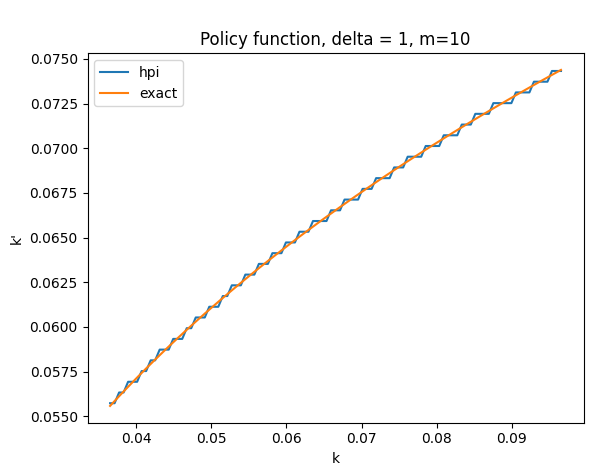


iterating for m = 25:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 1.7533351208116597
Execution time: 0.8078927993774414 seconds


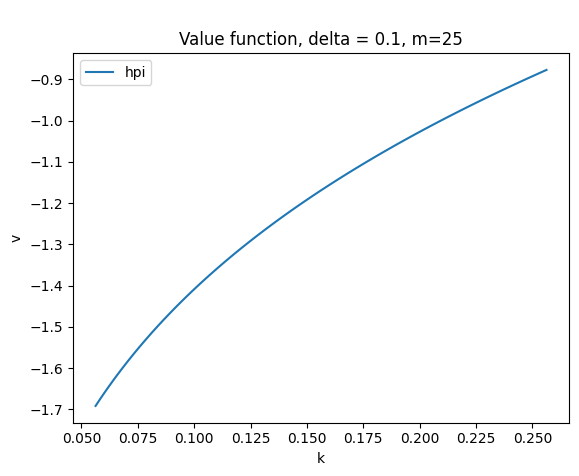

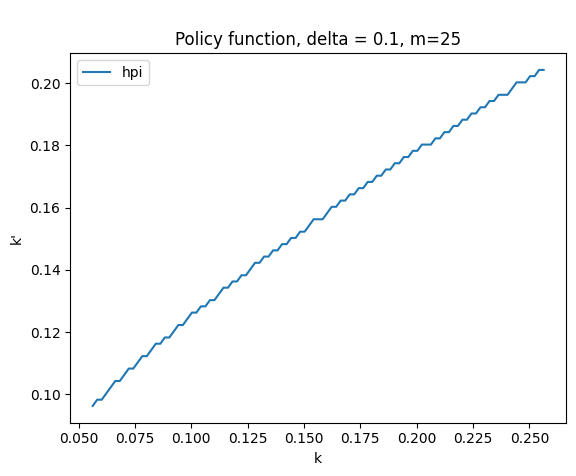


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 2.1934302544977378
Execution time: 0.7661960124969482 seconds


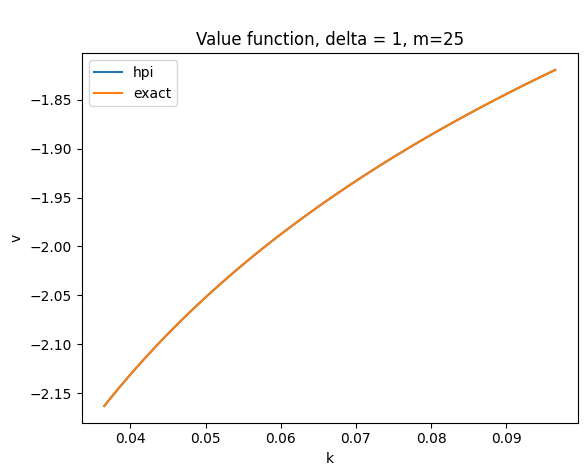

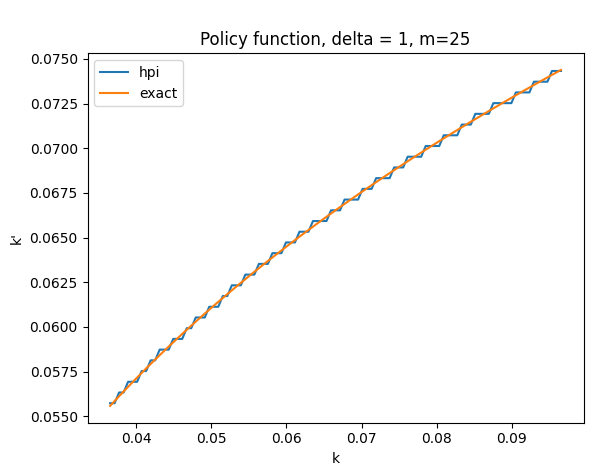


iterating for m = 100:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 1.7533351469383893
Execution time: 0.8812453746795654 seconds


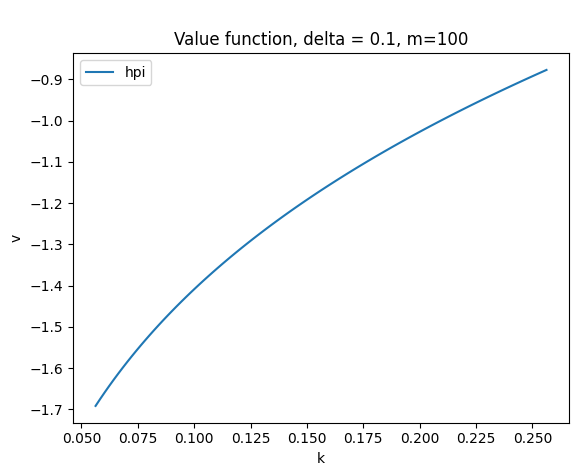

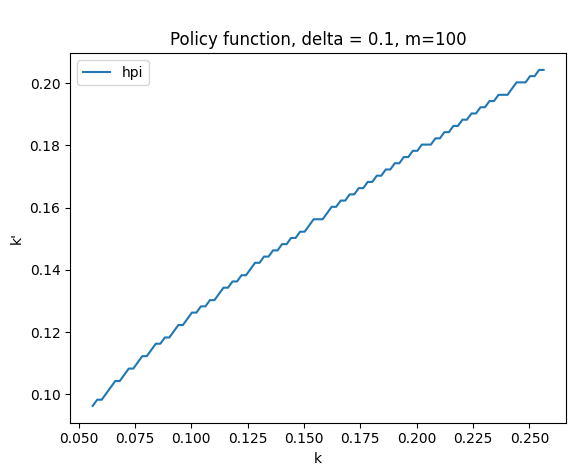


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 2.1934302871823963
Execution time: 0.8203368186950684 seconds


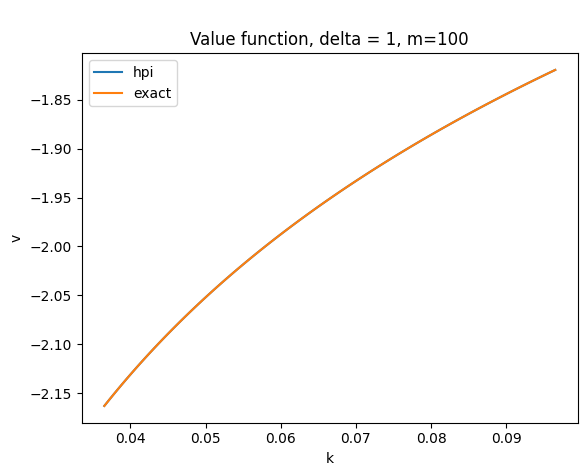

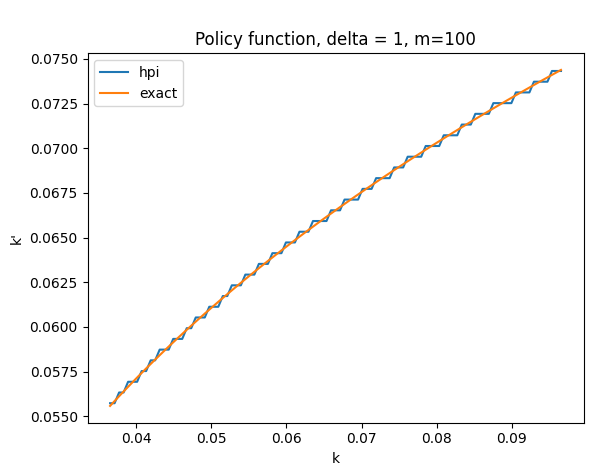


iterating for m = 500:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 1.7533351469383893
Execution time: 2.6763181686401367 seconds


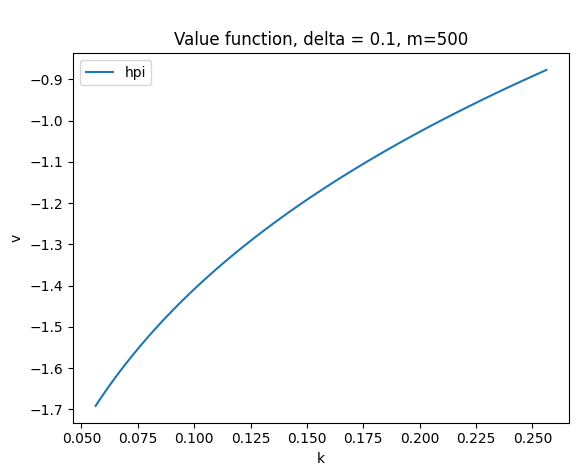

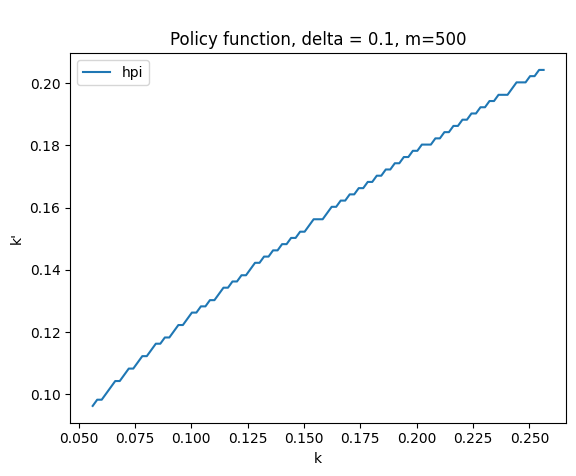


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 2.1934302871823963
Execution time: 2.6836376190185547 seconds


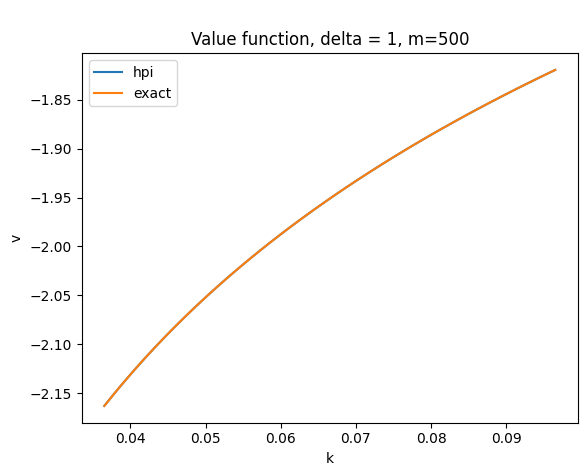

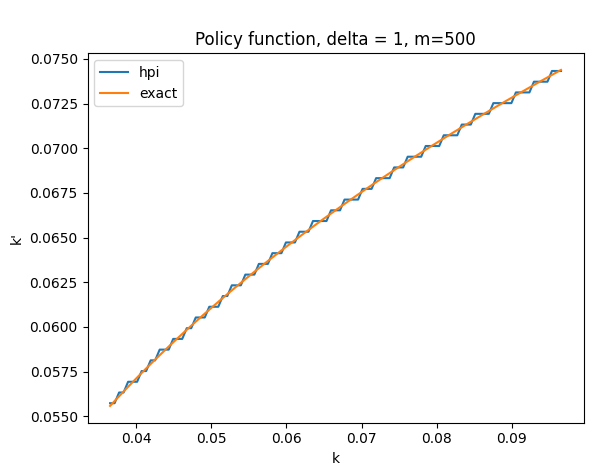

In [26]:
for m in m_values:
    print(f"\niterating for m = {m}:")
    for delta in delta_values:
        print(f"\niterating for delta = {delta}:")
        if delta == 1:
            K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
            print(K_ss)
            K_grid = np.linspace(K_ss-3e-2, K_ss+3e-2, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
            + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
            a1 = alpha / (1 - alpha * beta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()
        else:
            K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
            print(K_ss)
            K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()

# Now apply the MQP bounds

In [56]:
bnd_vals=[1,3,5]

In [60]:
def Tv_bounds(v, k, bnd, d, m):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    distance=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-delta) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax     
        v2=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i]
                v2[i]=u(c)+beta*v1[j]
            v1=np.copy(v2)
        v4=np.copy(v1)
        if iter % bnd == 0:
            #for i in range(len(k)):           
                #vect_c[i] = v4[i] - v[i]
            vect_c = v4 - v
            c_low =  np.min(vect_c) * (beta / (1 - beta))
            c_high = np.max(vect_c) * (beta / (1 - beta)) 
            for i in range(len(k)):
                v5[i]=v4[i] + (c_low+c_high) / 2
            v=np.copy(v5)
            error = c_high - c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=np.copy(v4) 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [70]:
def Tv_vfi_bound(v, k, d, bnd, beta):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    c_high = 0
    c_low = 0
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        if iter % bnd == 0:
            #for i in range(len(k)):           
            #    vect_c[i] = v1[i] - v[i]
            #c_low = (beta / (1 - beta)) * np.min(vect_c)
            #c_high = (beta / (1 - beta)) * np.max(vect_c)
            vect_c = v4 - v
            print((beta / (1 - beta)))
            c_low =  np.min(vect_c) * (beta / (1 - beta))
            c_high = np.max(vect_c) * (beta / (1 - beta)) 
            for i in range(len(k)):
                v2[i]=v1[i]+(c_low+c_high)/2
            v=v2.copy()
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v1.copy() 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [59]:
def Tv_howard_bound(v, k, m, d, bnd):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v3[i]=u(c)+beta*v1[j]
            v1=v3.copy()
        v4=v1.copy()
        if iter % bnd == 0:
            for i in range(len(k)):           
                vect_c[i] = (v4[i] - v[i])
            c_low = (beta / (1 - beta)) * np.min(vect_c)
            c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v5[i]=v4[i]+(c_low+c_high)/2
            v=v5.copy()
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v4.copy() 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11109339200598245
Iteration 2, Max Error: 0.0030228839470805013
Iteration 3, Max Error: 0.00018061727396401217
Iteration 4, Max Error: 3.7953054816686205e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 0.6358342170715332 seconds


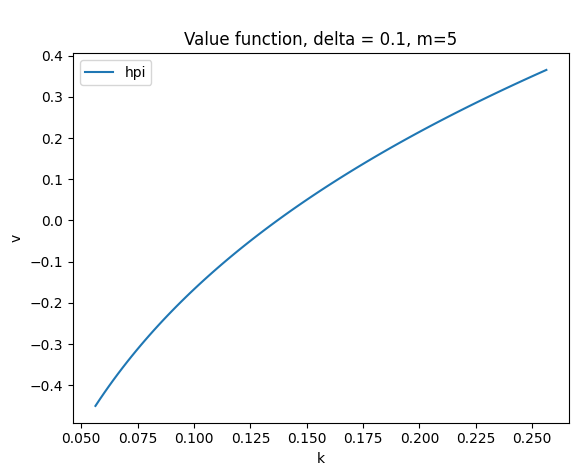

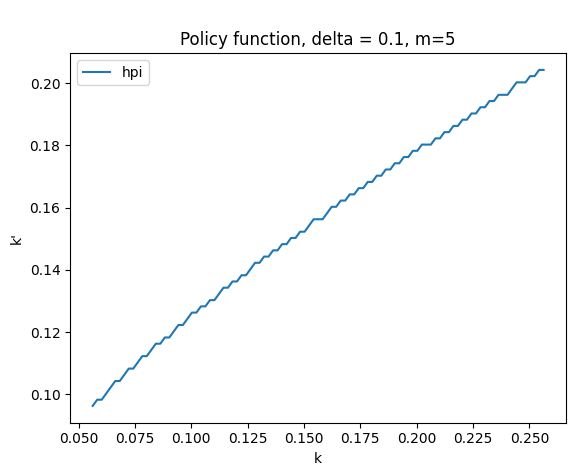


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.024071289385221295
Iteration 2, Max Error: 0.0002380481571144788
Iteration 3, Max Error: 5.285048785452773e-05
Iteration 4, Max Error: 1.0836879128950372e-05
Iteration 5, Max Error: 1.4520711755228177e-06
Execution time: 0.6901624202728271 seconds


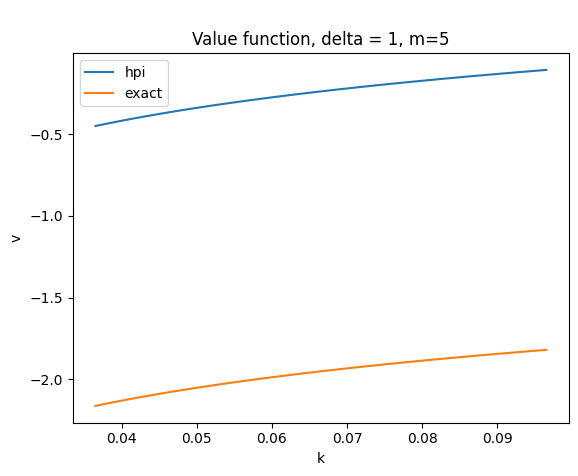

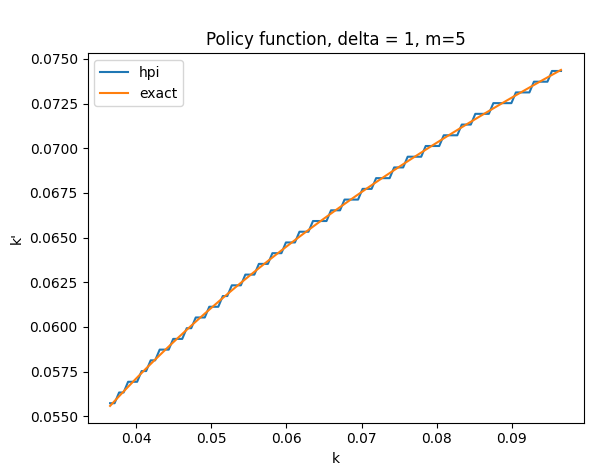


iterating for m = 10:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112183958600541
Iteration 2, Max Error: 0.0029957888341944905
Iteration 3, Max Error: 0.00018061727396379013
Iteration 4, Max Error: 3.794554806724193e-05
Iteration 5, Max Error: 3.6018528264403216e-06
Execution time: 0.6820507049560547 seconds


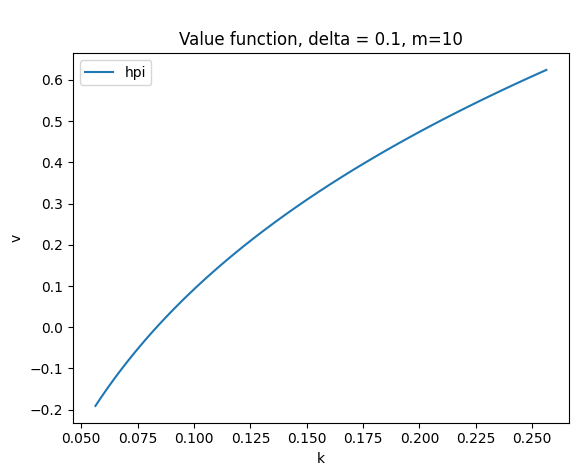

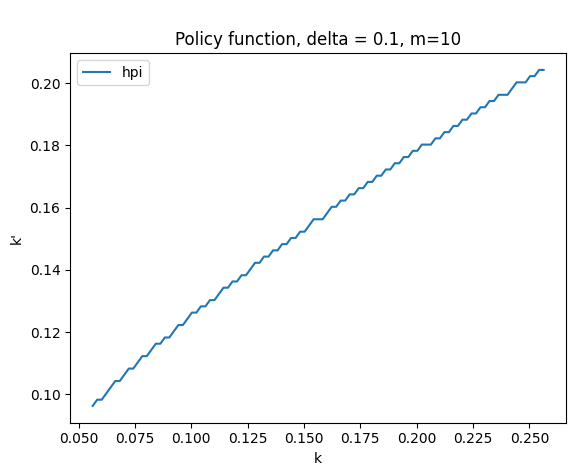


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.024077664394718035
Iteration 2, Max Error: 0.00023219950583452942
Iteration 3, Max Error: 5.285048785452773e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711766330407e-06
Execution time: 0.6772334575653076 seconds


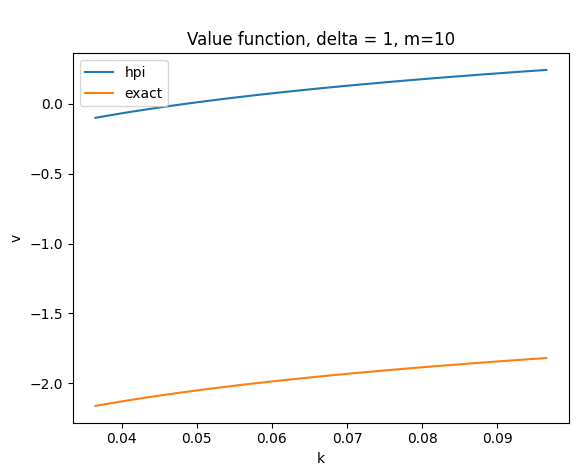

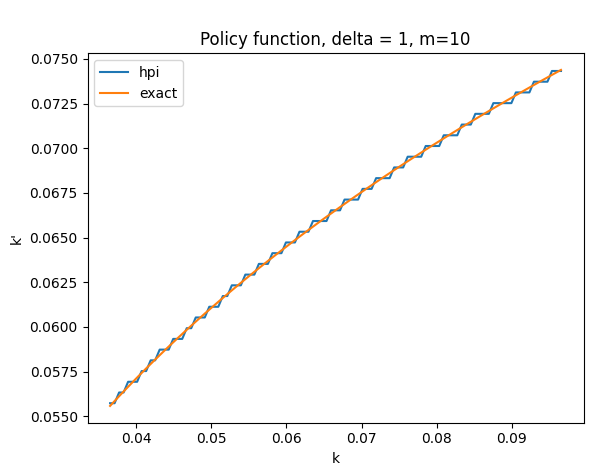


iterating for m = 25:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275722187226
Iteration 2, Max Error: 0.0029949148249683866
Iteration 3, Max Error: 0.00018061727396356808
Iteration 4, Max Error: 3.7960561107386326e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 0.8081657886505127 seconds


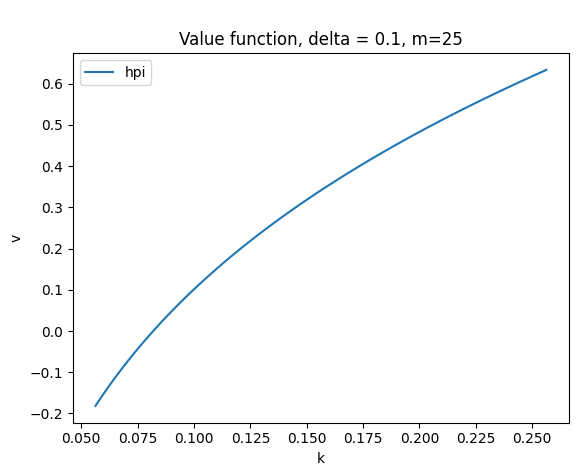

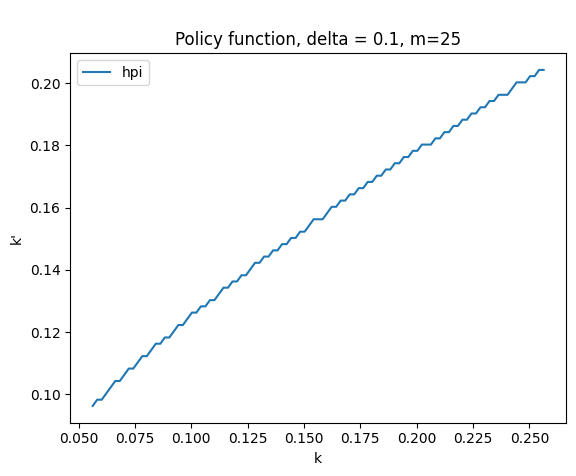


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.02407787003390993
Iteration 2, Max Error: 0.00023201084542190387
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711757448623e-06
Execution time: 0.801671028137207 seconds


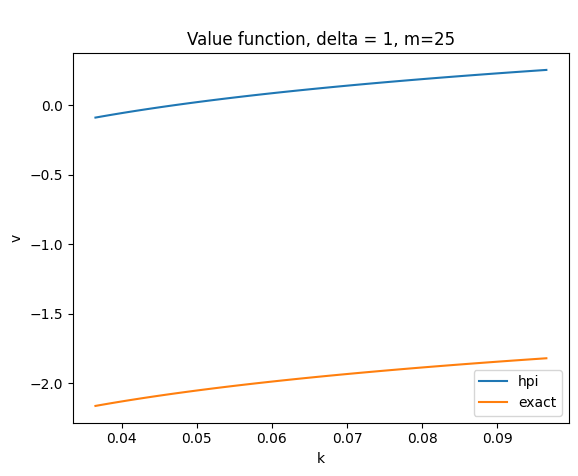

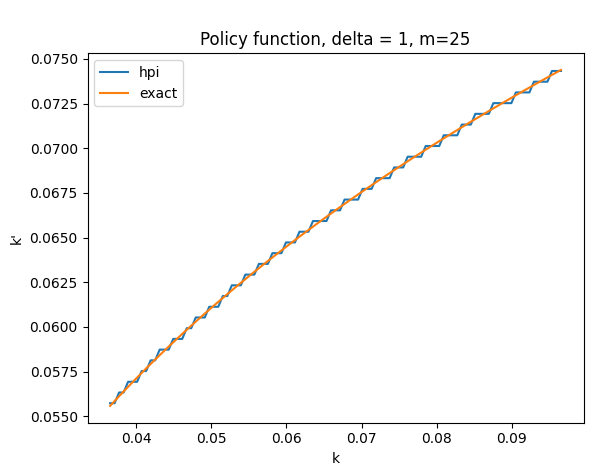


iterating for m = 100:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275724987719
Iteration 2, Max Error: 0.0029949147982948343
Iteration 3, Max Error: 0.00018061727396445626
Iteration 4, Max Error: 3.7960561565020257e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 1.3600428104400635 seconds


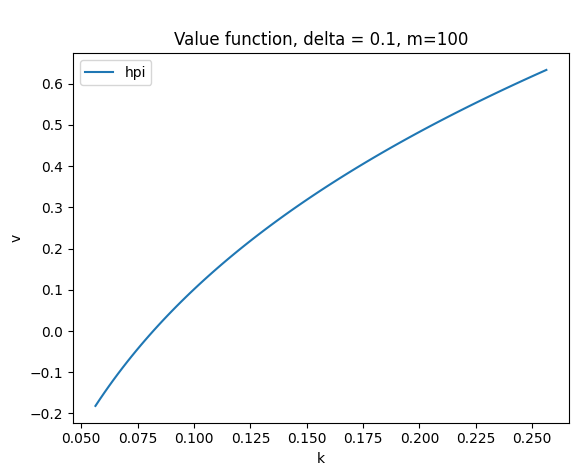

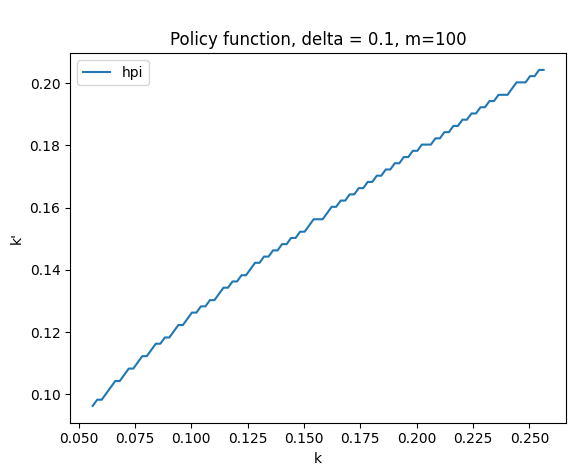


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.0240778700401858
Iteration 2, Max Error: 0.00023201083966384317
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711761889515e-06
Execution time: 0.8567430973052979 seconds


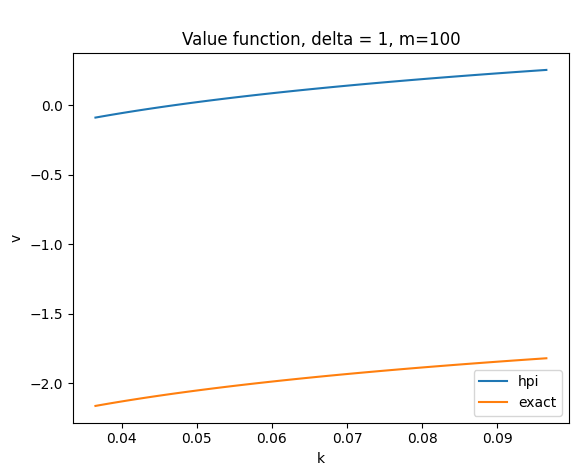

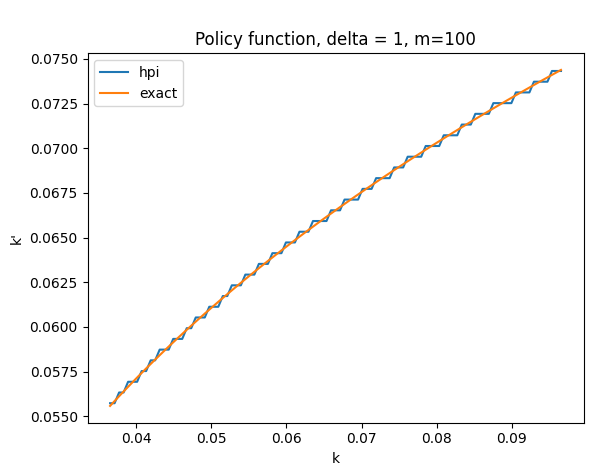


iterating for m = 500:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275724987719
Iteration 2, Max Error: 0.0029949147982948343
Iteration 3, Max Error: 0.00018061727396445626
Iteration 4, Max Error: 3.7960561565020257e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 2.7254951000213623 seconds


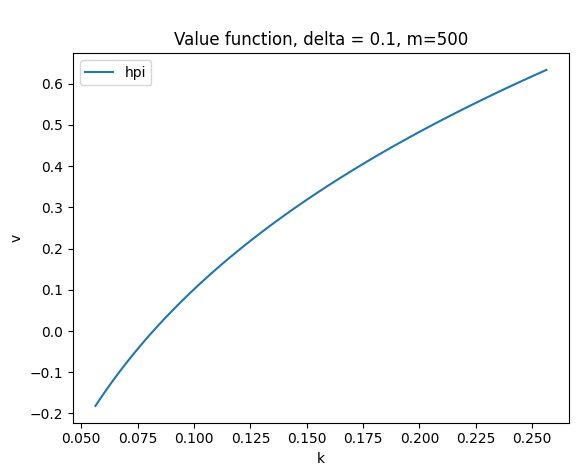

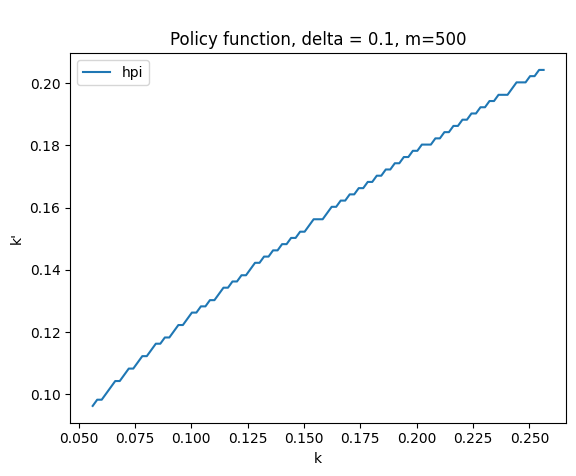


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.0240778700401858
Iteration 2, Max Error: 0.00023201083966384317
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711761889515e-06
Execution time: 2.713350534439087 seconds


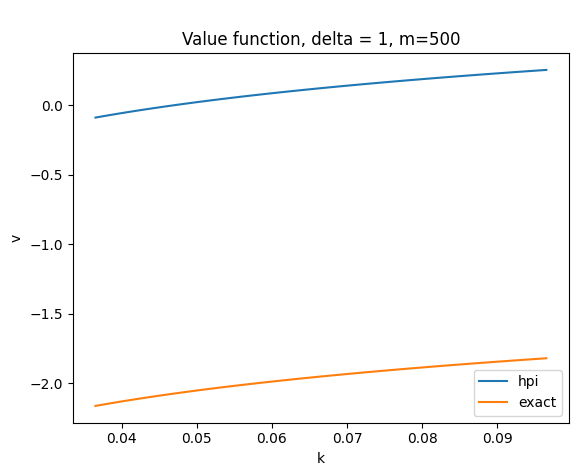

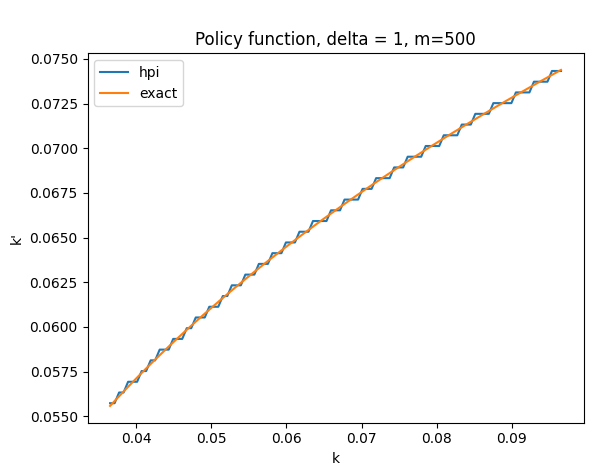


iterating for bnd = 3:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 1.4937861114815316
Iteration 2, Max Error: 0.029205402525550705
Iteration 3, Max Error: 0.00018061727396379013
Iteration 4, Max Error: 0.0005079500737887876
Iteration 5, Max Error: 7.929330446909688e-06
Execution time: 0.38184261322021484 seconds


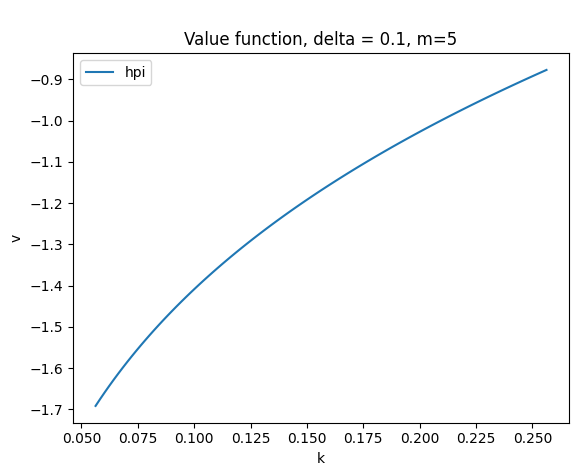

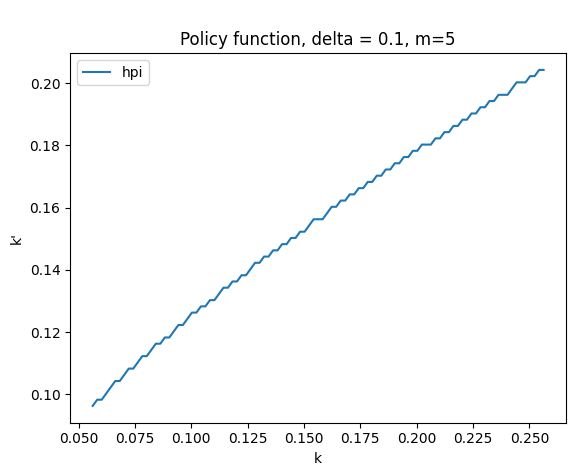


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 1.9880495217191312
Iteration 2, Max Error: 0.03177632663572183
Iteration 3, Max Error: 5.285048785452773e-05
Iteration 4, Max Error: 0.0005075196873396415
Iteration 5, Max Error: 7.929995114785982e-06
Execution time: 0.39722681045532227 seconds


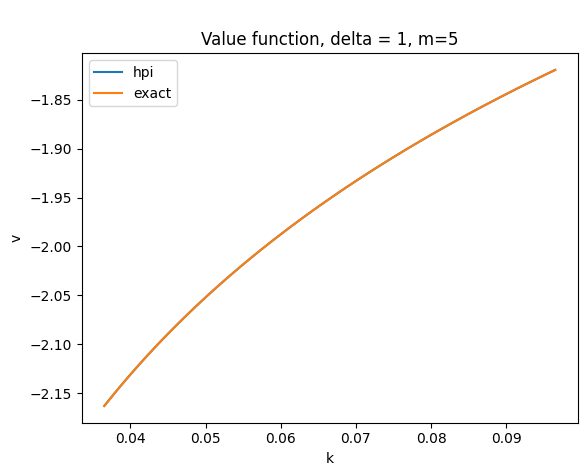

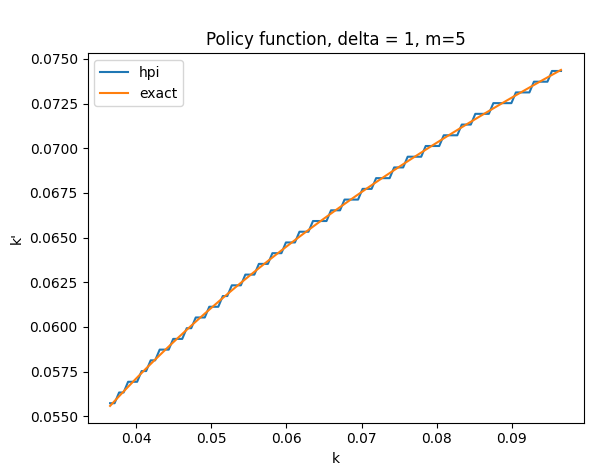


iterating for m = 10:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 1.5687558622990574
Iteration 2, Max Error: 0.0077528789067722315
Iteration 3, Max Error: 0.00018061727396379013
Iteration 4, Max Error: 9.328886125370417e-05
Iteration 5, Max Error: 3.5563016245188095e-06
Execution time: 0.4247243404388428 seconds


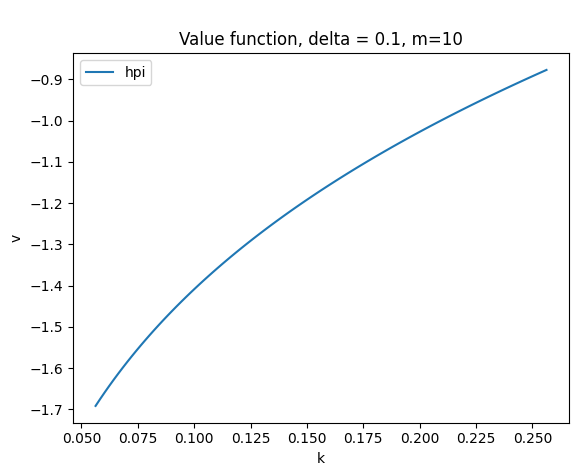

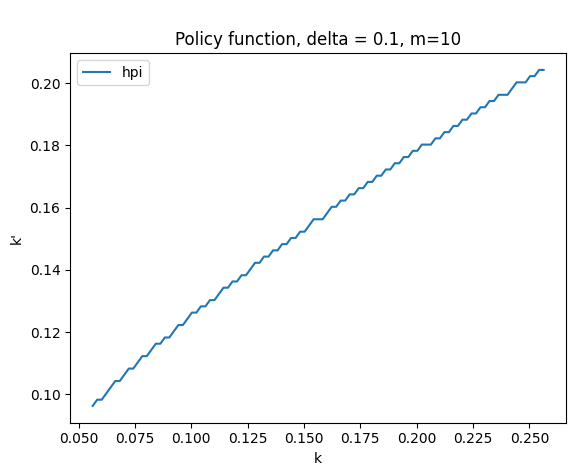


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 2.084801685801523
Iteration 2, Max Error: 0.0019277761269484994
Iteration 3, Max Error: 5.285048785408364e-05


KeyboardInterrupt: 

In [61]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-3e-2, K_ss+3e-2, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11109339200598245
Iteration 2, Max Error: 0.0030228839470805013
Iteration 3, Max Error: 0.00018061727396401217
Iteration 4, Max Error: 3.7953054816686205e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 0.648698091506958 seconds


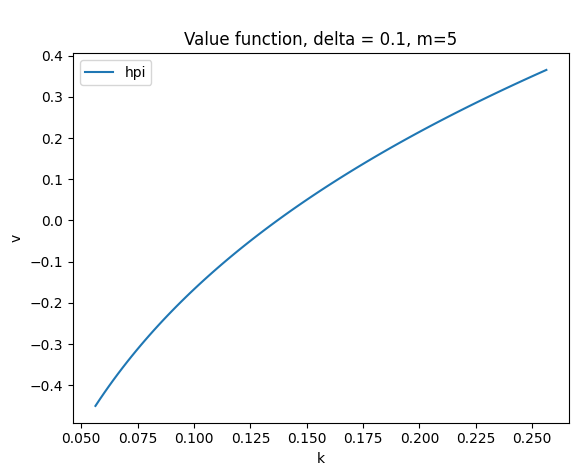

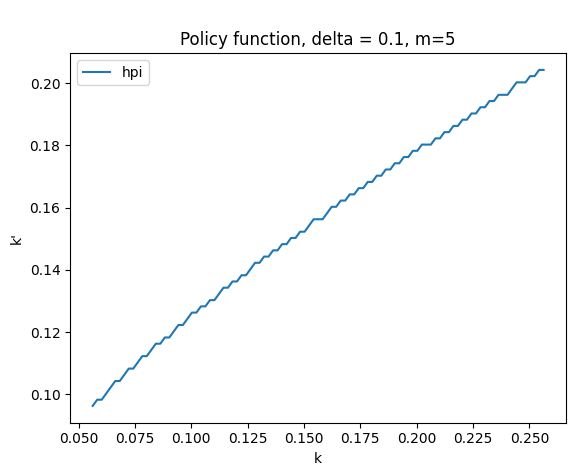


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.024071289385221295
Iteration 2, Max Error: 0.0002380481571144788
Iteration 3, Max Error: 5.285048785452773e-05
Iteration 4, Max Error: 1.0836879128950372e-05
Iteration 5, Max Error: 1.4520711755228177e-06
Execution time: 0.6402621269226074 seconds


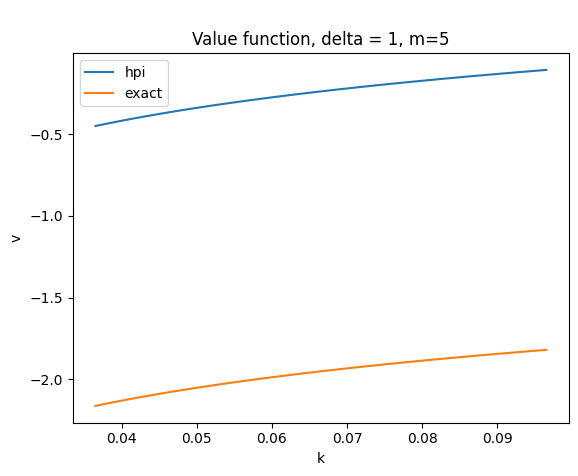

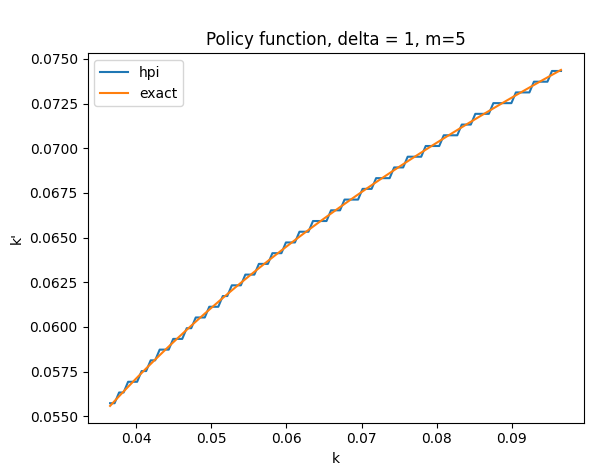


iterating for m = 10:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112183958600541
Iteration 2, Max Error: 0.0029957888341944905
Iteration 3, Max Error: 0.00018061727396379013
Iteration 4, Max Error: 3.794554806724193e-05
Iteration 5, Max Error: 3.6018528264403216e-06
Execution time: 0.6818175315856934 seconds


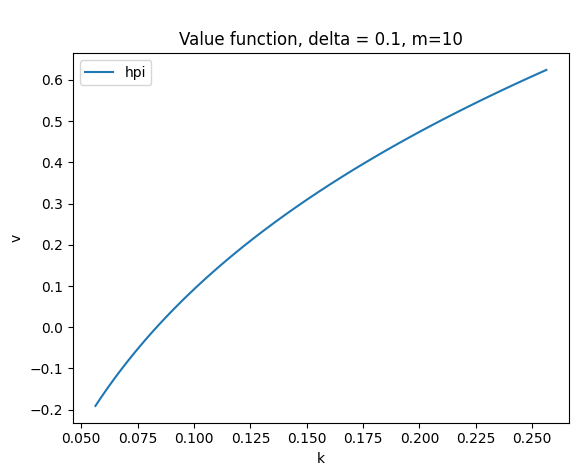

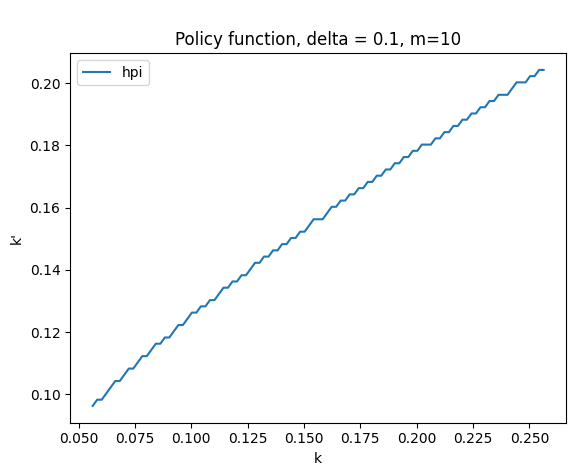


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.024077664394718035
Iteration 2, Max Error: 0.00023219950583452942
Iteration 3, Max Error: 5.285048785452773e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711766330407e-06
Execution time: 0.6904823780059814 seconds


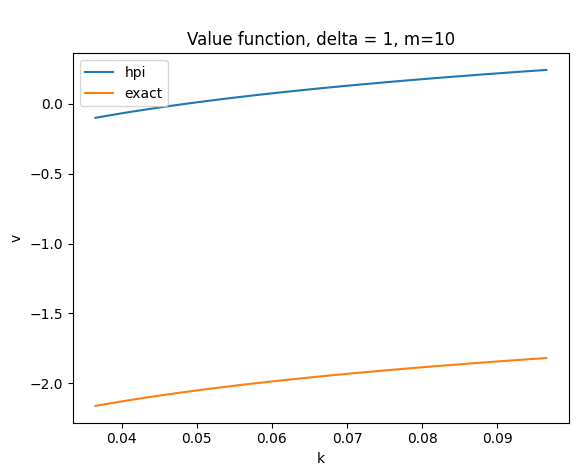

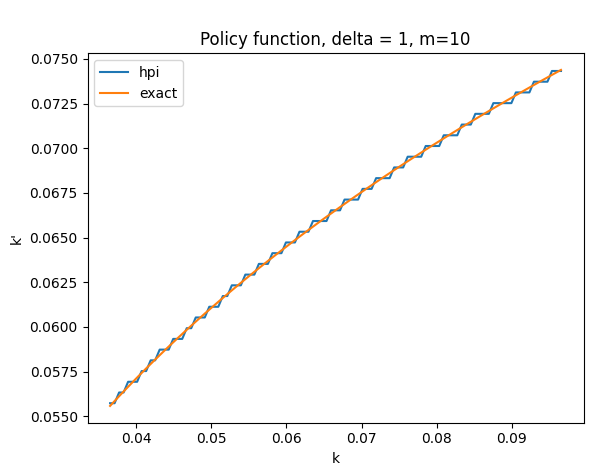


iterating for m = 25:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275722187226
Iteration 2, Max Error: 0.0029949148249683866
Iteration 3, Max Error: 0.00018061727396356808
Iteration 4, Max Error: 3.7960561107386326e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 0.7958774566650391 seconds


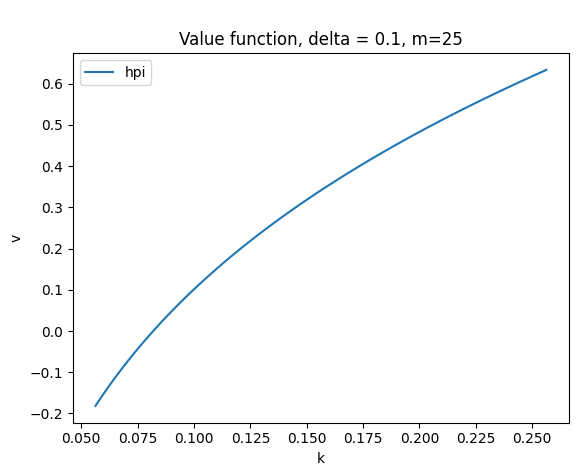

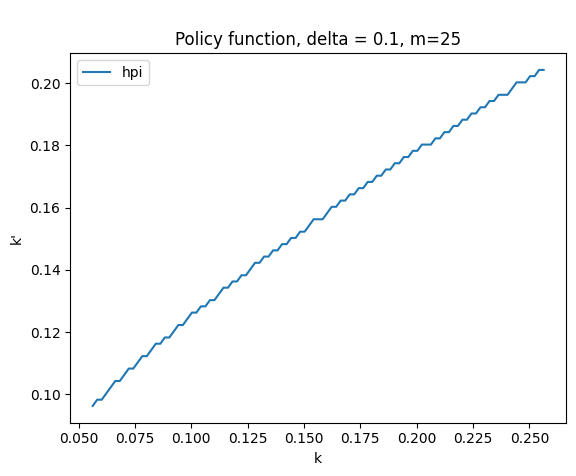


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.02407787003390993
Iteration 2, Max Error: 0.00023201084542190387
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711757448623e-06
Execution time: 0.8041226863861084 seconds


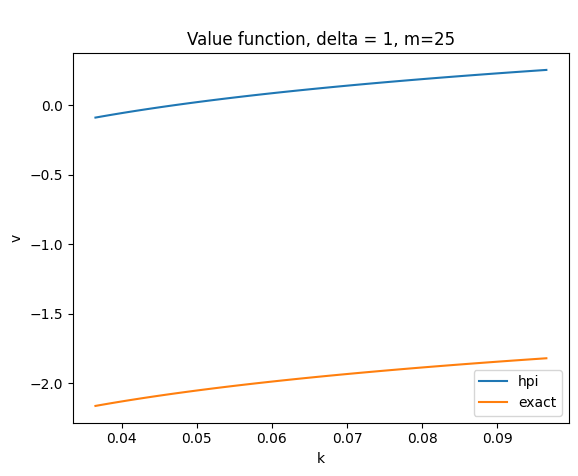

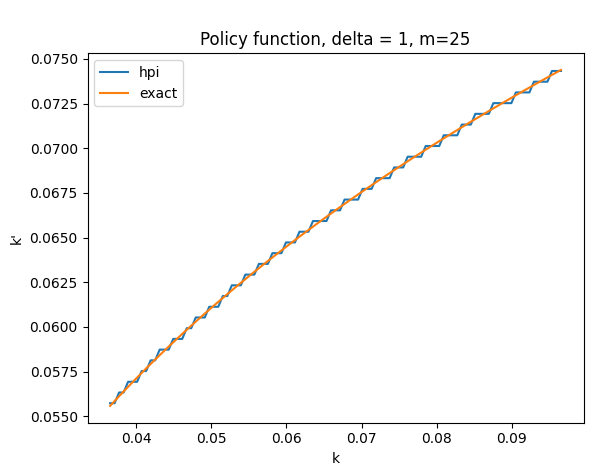


iterating for m = 100:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275724987719
Iteration 2, Max Error: 0.0029949147982948343
Iteration 3, Max Error: 0.00018061727396445626
Iteration 4, Max Error: 3.7960561565020257e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 1.353607177734375 seconds


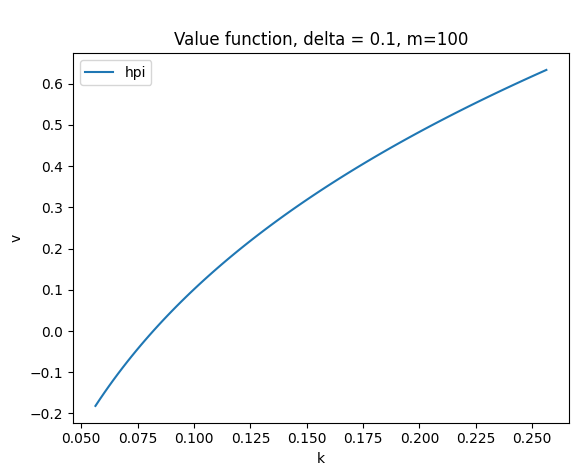

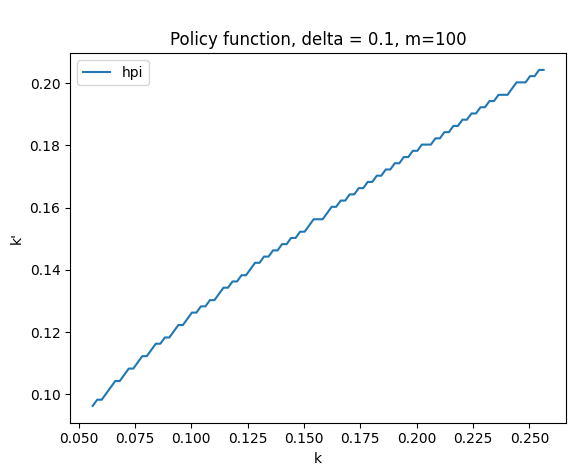


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.0240778700401858
Iteration 2, Max Error: 0.00023201083966384317
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711761889515e-06
Execution time: 0.8674116134643555 seconds


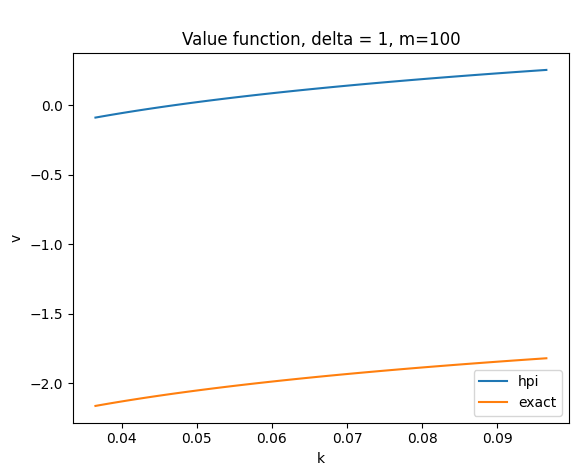

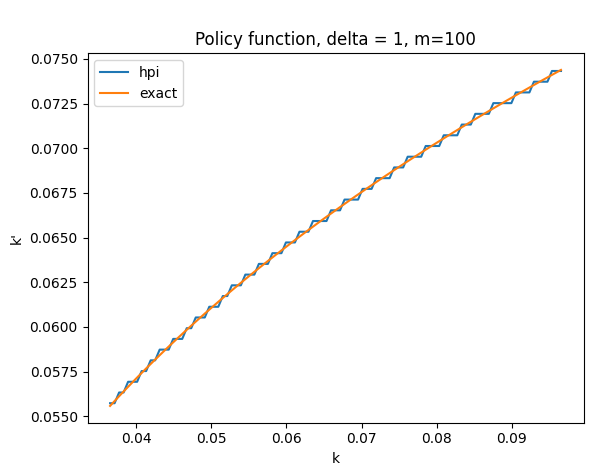


iterating for m = 500:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11112275724987719
Iteration 2, Max Error: 0.0029949147982948343
Iteration 3, Max Error: 0.00018061727396445626
Iteration 4, Max Error: 3.7960561565020257e-05
Iteration 5, Max Error: 3.601852826662366e-06
Execution time: 2.7001147270202637 seconds


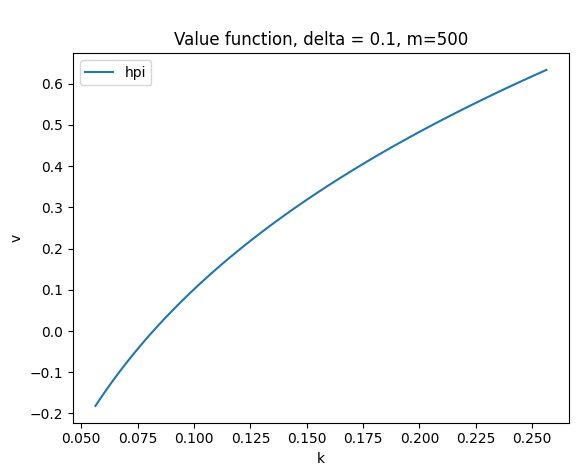

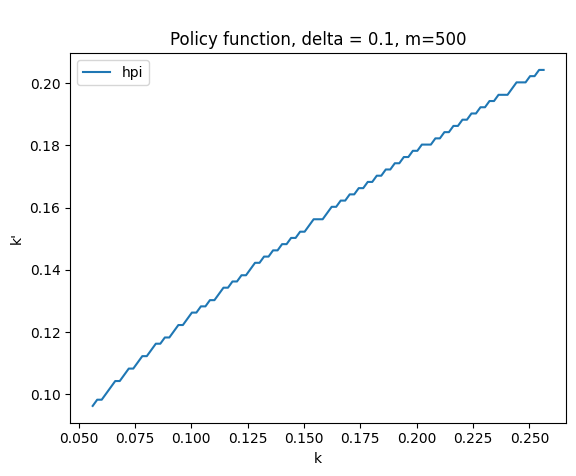


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.0240778700401858
Iteration 2, Max Error: 0.00023201083966384317
Iteration 3, Max Error: 5.285048785408364e-05
Iteration 4, Max Error: 1.0836879129172416e-05
Iteration 5, Max Error: 1.4520711761889515e-06
Execution time: 2.701503038406372 seconds


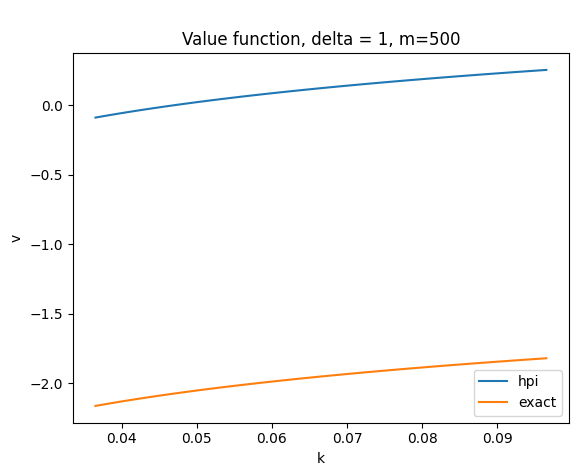

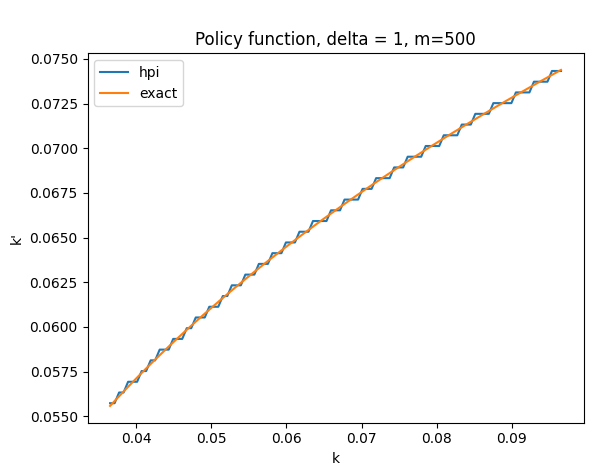


iterating for bnd = 3:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 1.4937861114815316
Iteration 2, Max Error: 0.029205402525550705
Iteration 3, Max Error: 0.00018061727396379013
Iteration 4, Max Error: 0.0005079500737887876
Iteration 5, Max Error: 7.929330446909688e-06
Execution time: 0.3943922519683838 seconds


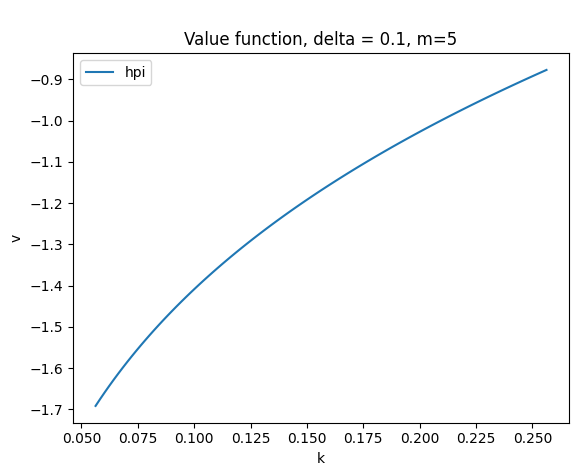

KeyboardInterrupt: 

In [48]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-3e-2, K_ss+3e-2, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()

In [71]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-3e-2, K_ss+3e-2, n_k)
                final_v, final_policy = Tv_vfi_bound(v_init, K_grid, m, delta, bnd)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
                final_v, final_policy = Tv_vfi_bound(v_init, K_grid, m, delta, bnd)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
0.5
1.0


ZeroDivisionError: division by zero

Now, we attempt to take advantage of the power of broadcasting in NumPy by vectorising our code.

In [83]:
def Tv_vec(delt, max_iteration, grid_size, A, alph, bet, toler):

    #K_max = ( A / delt ) ** (1/(1-alph))

    K_ss = (( alph * bet * A) / (1 - bet * (1 - delt)))** (1/(1 - alph))
    
    k = np.linspace(K_ss-1e-2, K_ss+1e-2, grid_size).reshape(-1,1)

    #k = np.linspace(1e-5, K_max, grid_size).reshape(-1,1)

    v = np.zeros(shape=(grid_size,1))

    policy=np.zeros(shape=(grid_size,1))

    #valid_indices=np.zeros(shape=(grid_size,1))

    start_time=time.time()

    iter = 0

    error=toler+1

    while (toler < error) and (iter < max_iteration):
        
        distance = np.zeros(shape=(grid_size,1))

        # Now, take advantage of broadcasting
        # First, calculate consumption. This code will produce a matrix of size (grid_size, grid_size)
        # where element (i,j) corresponds to consumption for capital i today and capital j tomorrow.

        #c = A * k[:, np.newaxis] ** 1-alph + ( 1 - delt ) * k[:, np.newaxis] - k

        c = A * k ** (alph) + ( 1 - delt ) * k - k.T
        #print(c)
        #print(c.shape)

        # In principle, the above code could allow for negative consumption. We prevent that next.y
        # For np.where(condition, x, y) means that x will be applied when the condition is true, and y when false

        c_pos = np.where(c>=0, c, np.nan)
        #print(c_pos)

        # Below, u is applied element-wise to c_pos, creating an (grid_size, grid_size) vector
        # as v it (grid_size, 1), we add it to each column of u(c_pos). This is what we mean by broadcasting.
        # So, v_temp_i,j = u(c)_i,j + beta * v_j.

        v_temp = u(c_pos) + bet * v
        #print(v_temp.shape)
        #print(v_temp)

        # Now, we maximise over the rows, since each row corresponds to a different current capital stock.
        # That is, for a given i, look at each column and pick the best

        vmax = np.nanmax(v_temp, axis=1)[:, np.newaxis]

        #print(vmax.shape)
        #print(vmax)

        # Similarly, find the policy function
        #valid_indices=np.where(np.isnan(v_temp))

        #policy=k[valid_indices[1][np.argmax(v_temp[valid_indices])]]
        policy = np.argmax(v_temp, axis=1)

        #print(policy)
        # Update value function and calculate distance

        v1 = vmax
        #print(v1)

        distance = np.abs(v1 - v)

        error = np.max(distance)

        v=np.copy(v1)

        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        
        iter +=1

    if iter == max_iteration:
        print("Failed to converge in max_iter iterations")

    end_time = time.time()

    execution_time = end_time - start_time

    print(f"Execution time: {execution_time} seconds")

    return v, policy

In [84]:
v_vec, pol_vec = Tv_vec(1, 10000 , 101, 0.5, 0.3, 0.5, 1e-5)
print(v_vec)
print(pol_vec)

Iteration 0, Max Error: 2.0690244742925805
Iteration 10, Max Error: 0.00202053171317651
Execution time: 0.007619619369506836 seconds
[[-4.13804106]
 [-4.12899903]
 [-4.12008162]
 [-4.11128547]
 [-4.10260737]
 [-4.09404421]
 [-4.08559304]
 [-4.07725098]
 [-4.0690153 ]
 [-4.06088333]
 [-4.05285252]
 [-4.04492043]
 [-4.03708467]
 [-4.02934295]
 [-4.02169308]
 [-4.01413292]
 [-4.00666041]
 [-3.99927356]
 [-3.99197046]
 [-3.98474924]
 [-3.97760811]
 [-3.97054533]
 [-3.96355921]
 [-3.95664813]
 [-3.94981051]
 [-3.94304482]
 [-3.93634957]
 [-3.92972334]
 [-3.92316472]
 [-3.91667236]
 [-3.91024495]
 [-3.90388123]
 [-3.89757994]
 [-3.89133989]
 [-3.88515992]
 [-3.87903888]
 [-3.87297568]
 [-3.86696924]
 [-3.86101853]
 [-3.85512252]
 [-3.84928023]
 [-3.8434907 ]
 [-3.83775299]
 [-3.8320662 ]
 [-3.82642944]
 [-3.82084184]
 [-3.81530256]
 [-3.80981077]
 [-3.80436569]
 [-3.79896653]
 [-3.79361253]
 [-3.78830295]
 [-3.78303706]
 [-3.77781416]
 [-3.77263355]
 [-3.76749457]
 [-3.76239656]
 [-3.7573388

C:\Users\bayle\AppData\Local\Temp\ipykernel_5052\2126697831.py:16: RuntimeWarning: invalid value encountered in log
  plt.plot(k, a0 + a1 * np.log(k), label = 'verify')


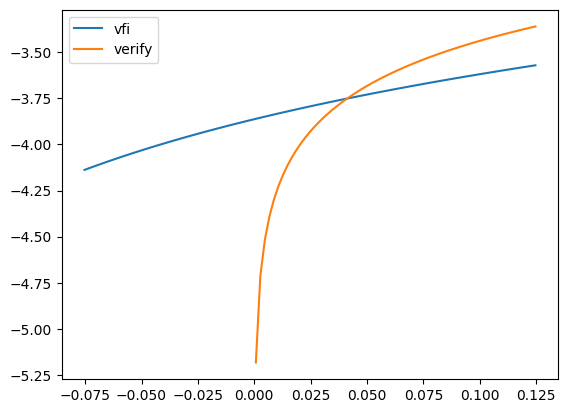

C:\Users\bayle\AppData\Local\Temp\ipykernel_5052\2126697831.py:21: RuntimeWarning: invalid value encountered in power
  plt.plot(k, A * beta * alpha * k ** alpha, label = 'verify')


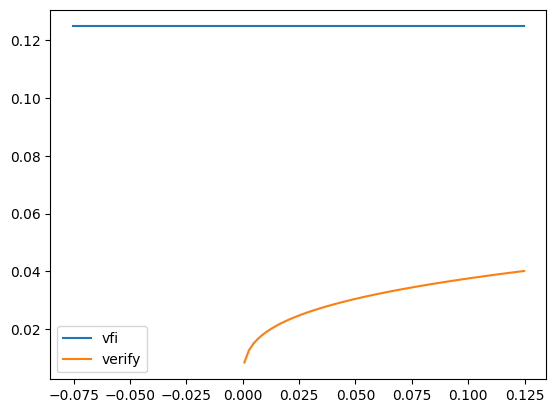

In [85]:
A = 0.5
delta = 1
beta = 0.5
alpha = 0.3
size=1001

K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))

k = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)

a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))

a1 = alpha / (1 - alpha * beta)

plt.plot(k, v_vec, label = 'vfi')
plt.plot(k, a0 + a1 * np.log(k), label = 'verify')
plt.legend()
plt.show()

plt.plot(k, k[pol_vec], label = 'vfi')
plt.plot(k, A * beta * alpha * k ** alpha, label = 'verify')
plt.legend()
plt.show()